In [1]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Análisis de Spotify
Preguntas interesantes para considerar:
- El objetivo es poder estimar si un tema nuevo del gusto de la persona que tiene esta playlist activa. En este caso la variable label corresponde a nuestra variable de salida a analizar

In [2]:
# Análisis exploratorio inicial
playlist = pd.read_csv('data_playlist.csv')
playlist.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


In [3]:
playlist.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
label               0
dtype: int64

In [4]:
# Vemos primero el tipo de información que tiene cada variable
print("columnas, filas: ", playlist.shape, "\n")
playlist.info()

columnas, filas:  (750, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      750 non-null    float64
 1   danceability      750 non-null    float64
 2   duration          750 non-null    int64  
 3   energy            750 non-null    float64
 4   instrumentalness  750 non-null    float64
 5   key               750 non-null    int64  
 6   liveness          750 non-null    float64
 7   loudness          750 non-null    float64
 8   mode              750 non-null    int64  
 9   speechiness       750 non-null    float64
 10  tempo             750 non-null    float64
 11  time_signature    750 non-null    int64  
 12  valence           750 non-null    float64
 13  label             750 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 82.2 KB


De `.info()` podemos sacar que:
- No existen valores no nulos, por lo tanto, no habría que rellenarlos.
- Todos los features son numéricos, aunque no podríamos especificar el tipo todavía.

#### Acousticness

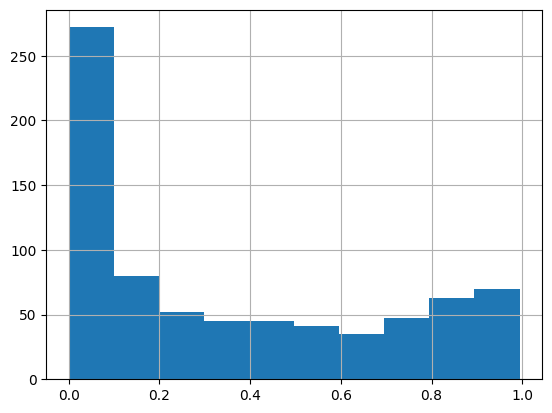

In [5]:
playlist.acousticness.hist();

- Valores continuos entre 0 y 1.
- La mayoría de los valores son bajos.
- A priori, no tiene una fistribución conocida.

#### Danceability

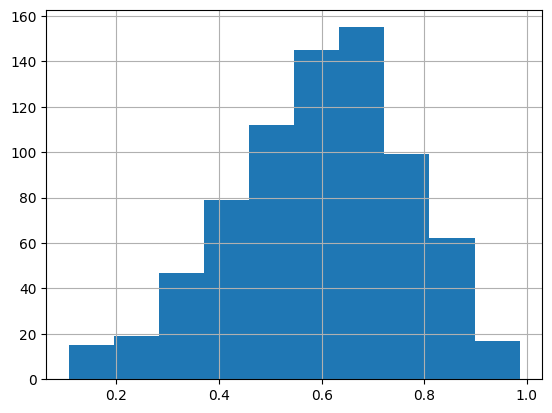

In [6]:
playlist.danceability.hist();

- Valores continuos entre 0 y 1.
- Tiene skewness.

#### Duration

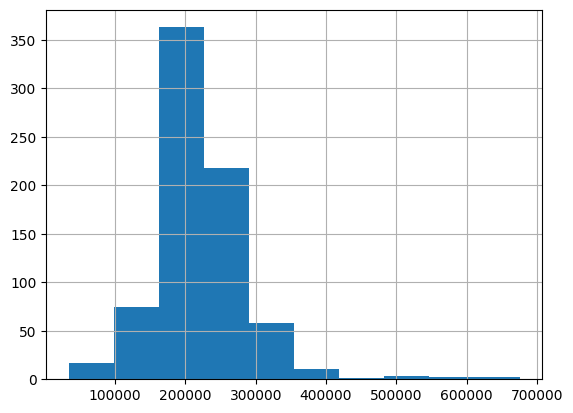

In [7]:
playlist.duration.hist();

#### Energy

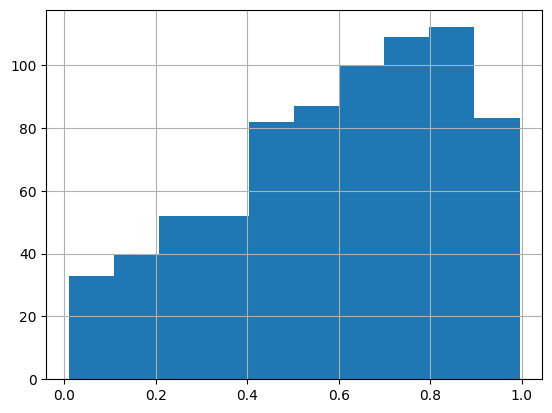

In [8]:
playlist.energy.hist();

#### Instrumentalness

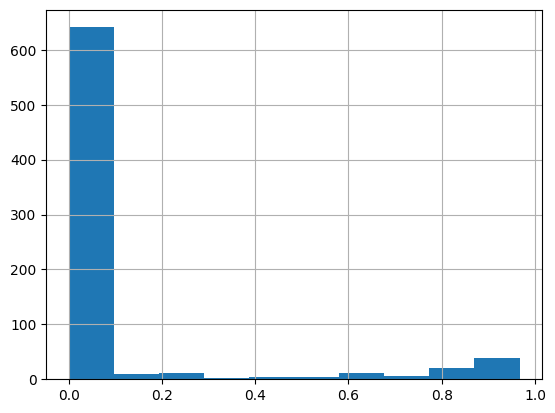

In [9]:
playlist.instrumentalness.hist();

#### Key

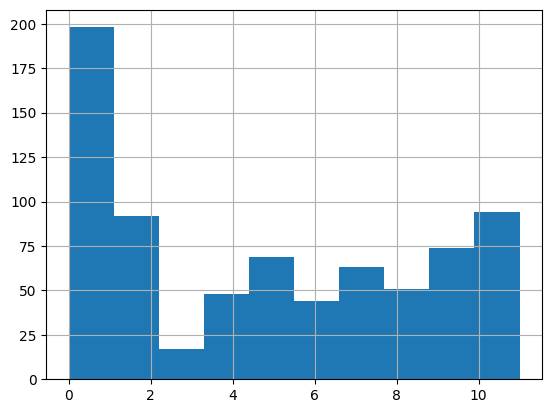

In [10]:
playlist.key.hist();

In [11]:
playlist.key.value_counts().sort_values(ascending=False)

0     113
2      92
1      85
9      74
5      69
7      63
8      51
4      48
10     48
11     46
6      44
3      17
Name: key, dtype: int64

#### Liveness

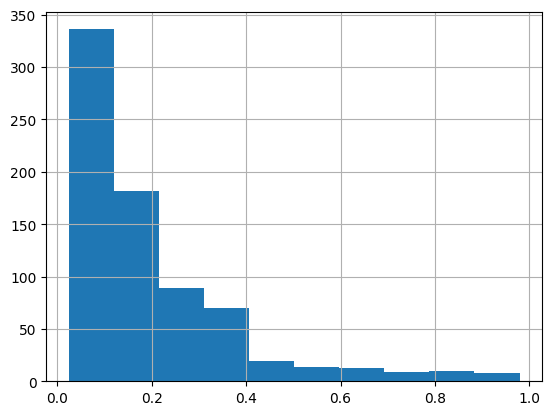

In [12]:
playlist.liveness.hist();

#### Loudness

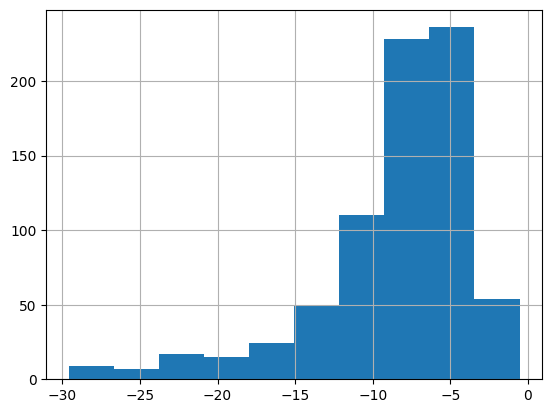

In [13]:
playlist.loudness.hist();

#### Mode

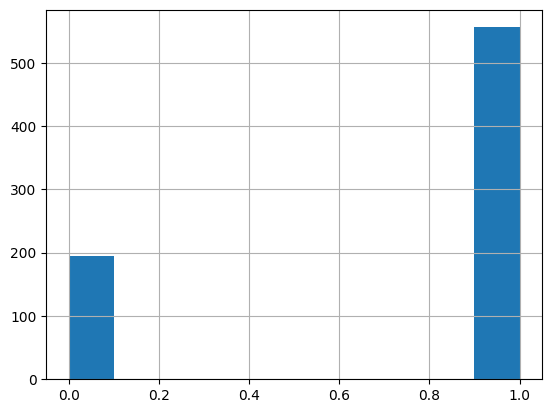

In [14]:
playlist['mode'].hist();

In [15]:
playlist['mode'].value_counts()

1    556
0    194
Name: mode, dtype: int64

#### Speechiness

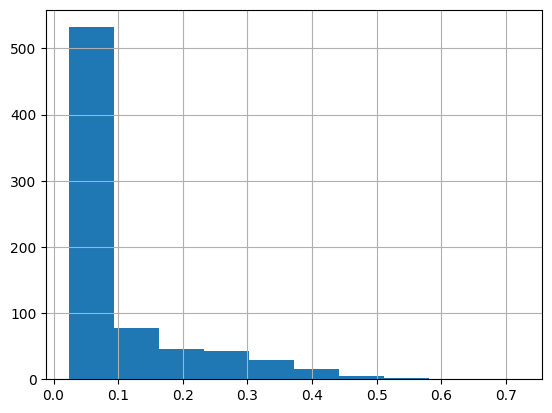

In [16]:
playlist.speechiness.hist();

#### Tempo

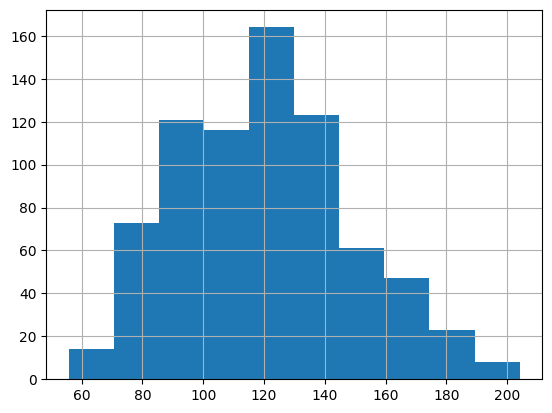

In [17]:
playlist.tempo.hist();

#### Time Signature

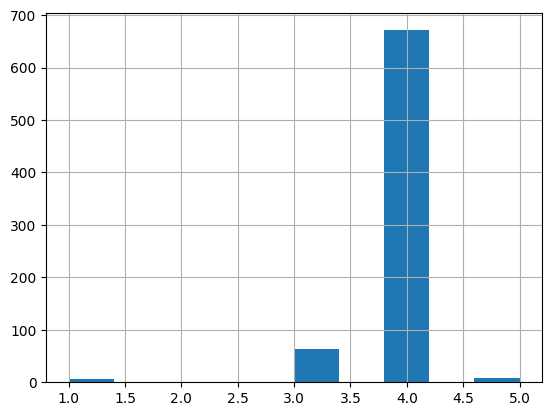

In [18]:
playlist.time_signature.hist();

In [19]:
playlist.time_signature.value_counts()

4    671
3     64
5      9
1      6
Name: time_signature, dtype: int64

#### Valence

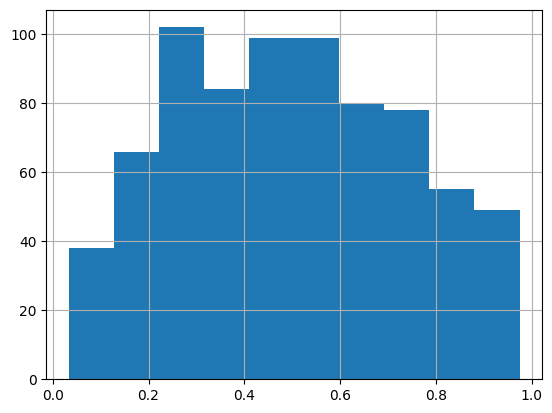

In [20]:
playlist.valence.hist();

#### Label

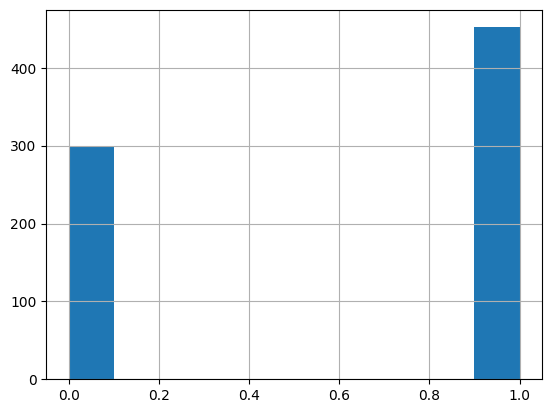

In [21]:
playlist.label.hist();

In [22]:
playlist.label.value_counts()

1    452
0    298
Name: label, dtype: int64

- Si bien existe una diferencia entre los dos labels, se puede decir que no está desbalanceado.

## Análisis detallado

In [23]:
playlist.describe()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.357394,0.596439,220112.733333,0.594188,0.100245,4.829333,0.203376,-8.509339,0.741333,0.098966,120.405761,3.902667,0.497321,0.602667
std,0.338405,0.172036,65587.690483,0.253301,0.259921,3.636001,0.177609,5.039488,0.438194,0.104715,28.378116,0.400091,0.239615,0.489673
min,0.000001,0.107000,33840.000000,0.009250,0.000000,0.000000,0.024000,-29.601000,0.000000,0.023400,55.747000,1.000000,0.033200,0.000000
25%,0.037150,0.480000,185490.250000,0.423250,0.000000,1.000000,0.094550,-10.173500,0.000000,0.035900,98.998000,4.000000,0.297000,0.000000
50%,0.244500,0.606000,215108.500000,0.631500,0.000010,5.000000,0.129000,-7.270000,1.000000,0.048750,120.104500,4.000000,0.483000,1.000000
75%,0.678500,0.715750,244236.750000,0.804750,0.002245,8.000000,0.264750,-5.097750,1.000000,0.113000,138.074750,4.000000,0.684500,1.000000
max,0.994000,0.986000,675360.000000,0.995000,0.967000,11.000000,0.979000,-0.533000,1.000000,0.721000,204.162000,5.000000,0.975000,1.000000


In [24]:
numericas = ['acousticness', 'danceability', 'duration', 'energy', 'instrumentalness','liveness', 'loudness', 'speechiness', 'tempo', 'valence']
categoricas = ['key', 'mode', 'time_signature']

In [25]:
playlist[numericas].skew().sort_values()

loudness           -1.693115
energy             -0.458765
danceability       -0.311981
valence             0.104812
tempo               0.334763
acousticness        0.534804
duration            1.576231
speechiness         2.040370
liveness            2.156240
instrumentalness    2.488166
dtype: float64

In [26]:
# Usamos una función útil para ver todas las distribuciones
def display_dataset_distributions(dataset):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()

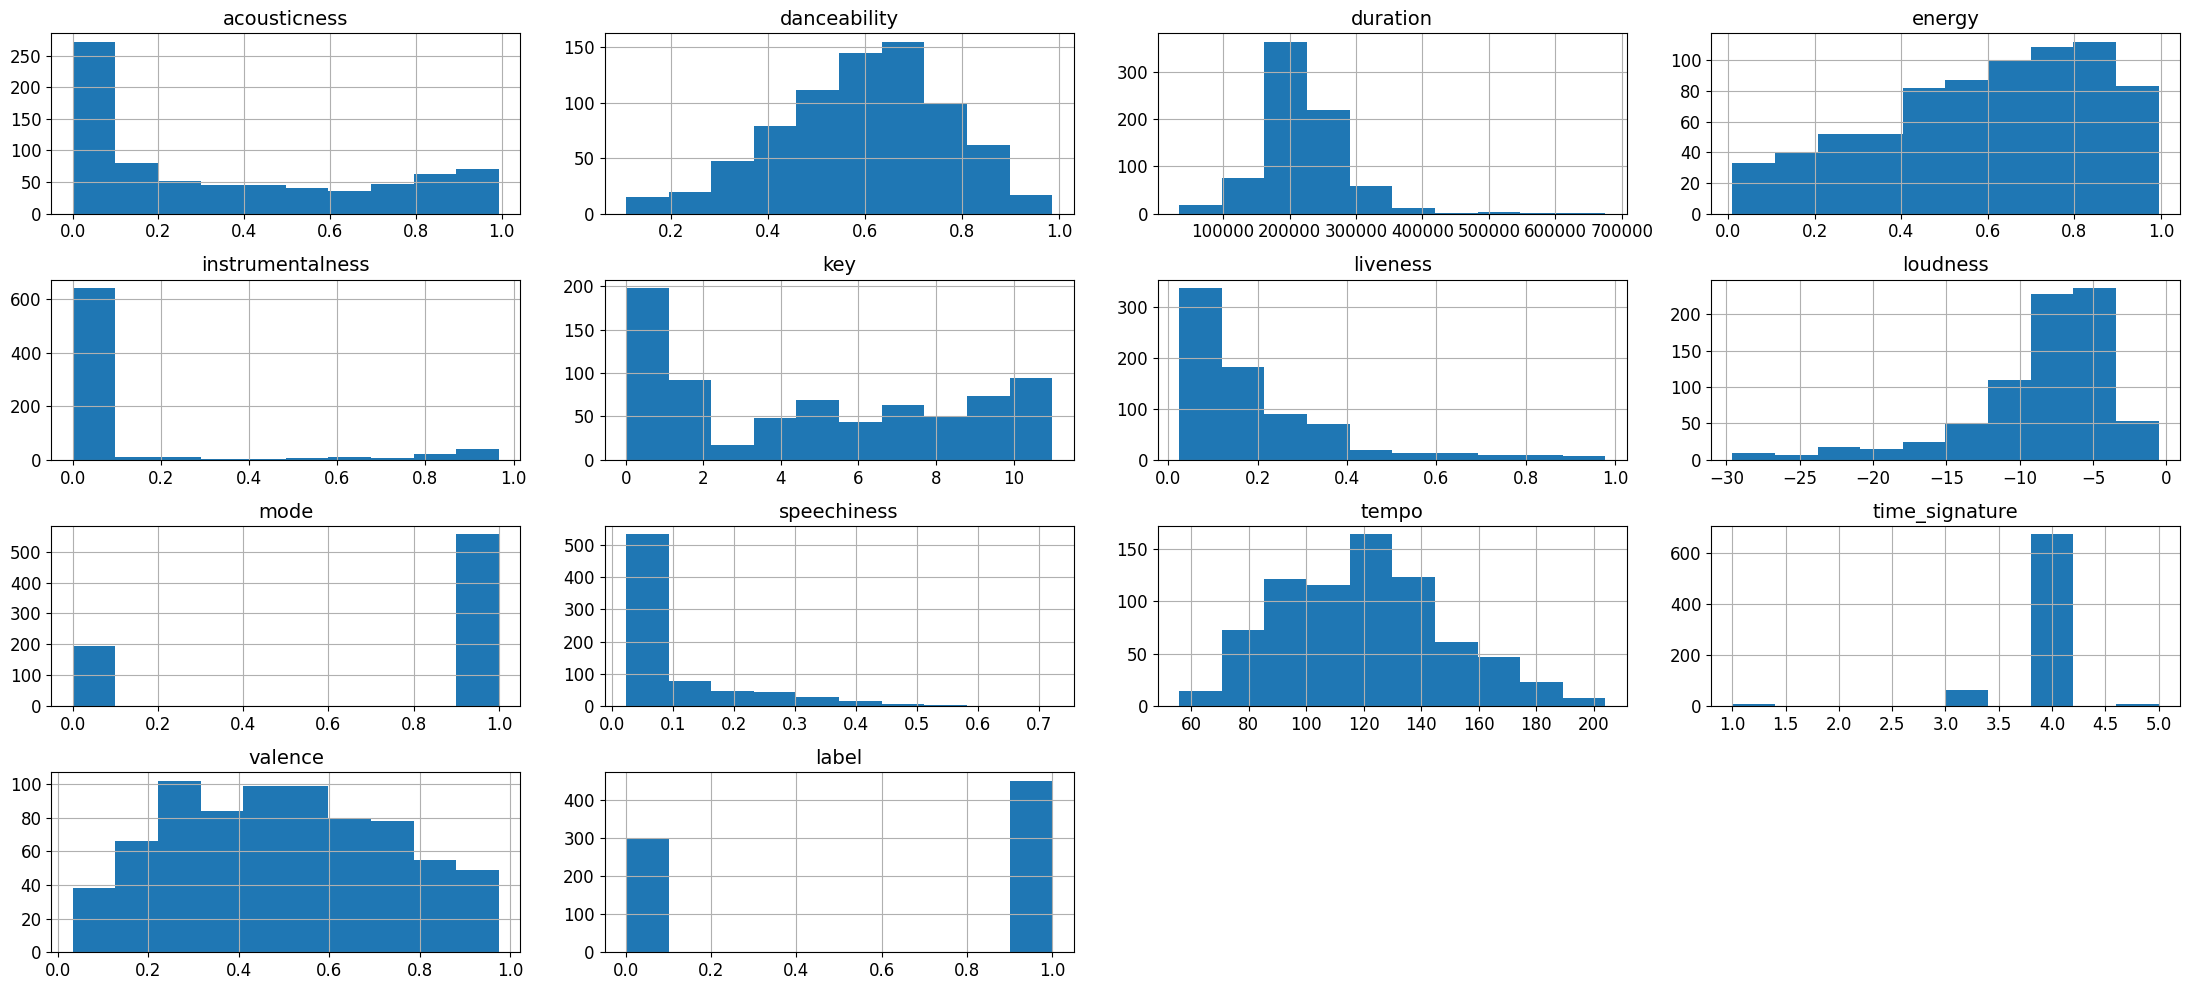

In [27]:
display_dataset_distributions(playlist)

In [28]:
# Vemos como está la correlación de las variables
playlist.corr()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
acousticness,1.000000,-0.417974,0.054988,-0.781691,0.331659,-0.065184,-0.140326,-0.695163,0.111980,-0.215614,-0.149472,-0.205854,-0.233485,0.479307
danceability,-0.417974,1.000000,-0.231120,0.360971,-0.238865,0.055302,-0.115735,0.396021,-0.058461,0.272283,0.064002,0.222486,0.483361,-0.368501
duration,0.054988,-0.231120,1.000000,-0.093435,0.161803,-0.002089,-0.002576,-0.179952,-0.011989,-0.110645,-0.052321,-0.003030,-0.256984,0.138562
energy,-0.781691,0.360971,-0.093435,1.000000,-0.267846,0.066970,0.235887,0.830081,-0.102567,0.173371,0.197741,0.241667,0.364495,-0.459088
instrumentalness,0.331659,-0.238865,0.161803,-0.267846,1.000000,-0.020726,-0.050720,-0.429529,-0.032180,-0.145104,-0.081531,-0.024597,-0.228774,0.133523
key,-0.065184,0.055302,-0.002089,0.066970,-0.020726,1.000000,-0.055710,0.009126,-0.158468,0.081137,-0.084476,0.096863,0.068146,-0.075631
liveness,-0.140326,-0.115735,-0.002576,0.235887,-0.050720,-0.055710,1.000000,0.154176,-0.023585,0.106747,-0.008093,0.037201,0.051110,-0.108682
loudness,-0.695163,0.396021,-0.179952,0.830081,-0.429529,0.009126,0.154176,1.000000,-0.048111,0.188873,0.188127,0.169130,0.294852,-0.424345
mode,0.111980,-0.058461,-0.011989,-0.102567,-0.032180,-0.158468,-0.023585,-0.048111,1.000000,-0.118390,0.013911,-0.044799,0.051939,0.080375
speechiness,-0.215614,0.272283,-0.110645,0.173371,-0.145104,0.081137,0.106747,0.188873,-0.118390,1.000000,0.139993,0.088062,0.101257,-0.480931


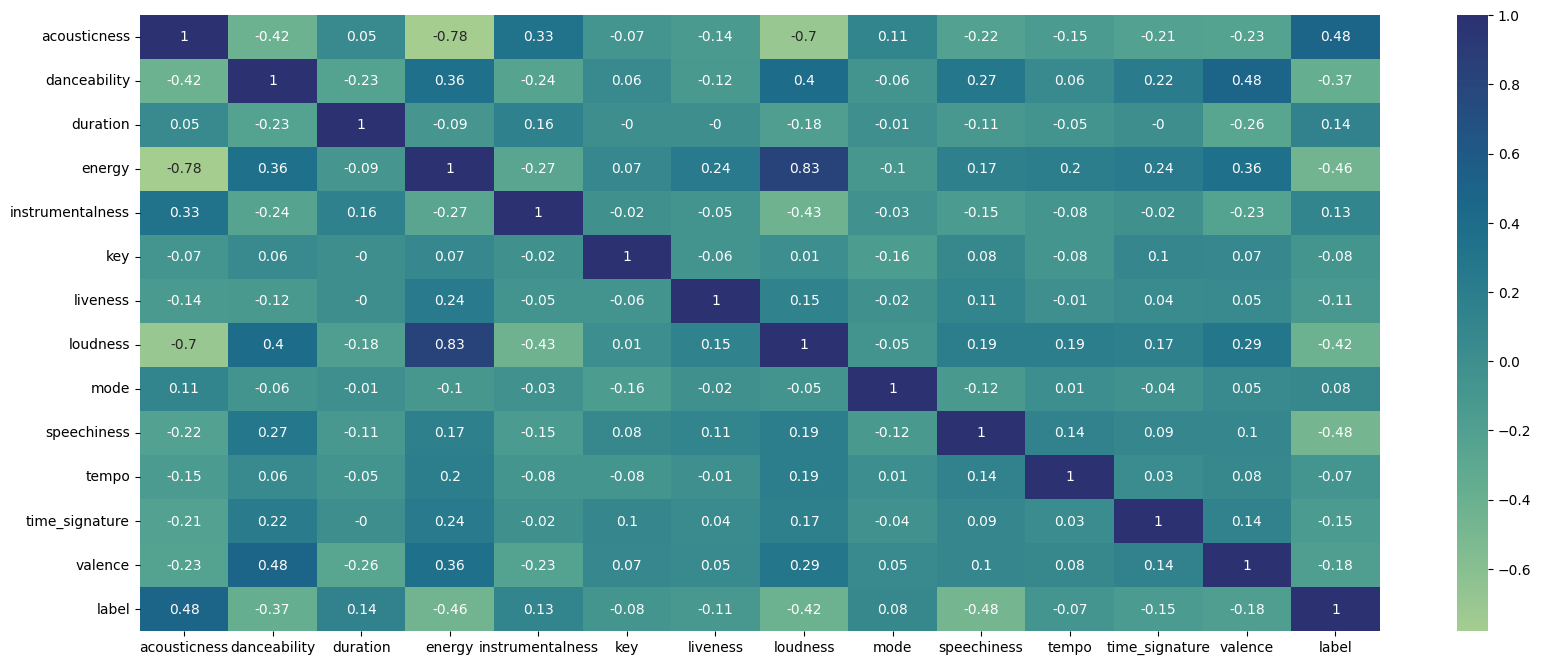

In [29]:
# Matriz de correlación, redondeo a 2 decimales
correlation_matrix = playlist.corr().round(2)
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(data=correlation_matrix, annot=True,ax=axes, cmap='crest');

- Podemos decir que con un valor de correlación arriba del 75%, esos dos features tienen cierta correlación.
- Podemos tomar `acousticness` con `energy` y `loudness` con `energy`.

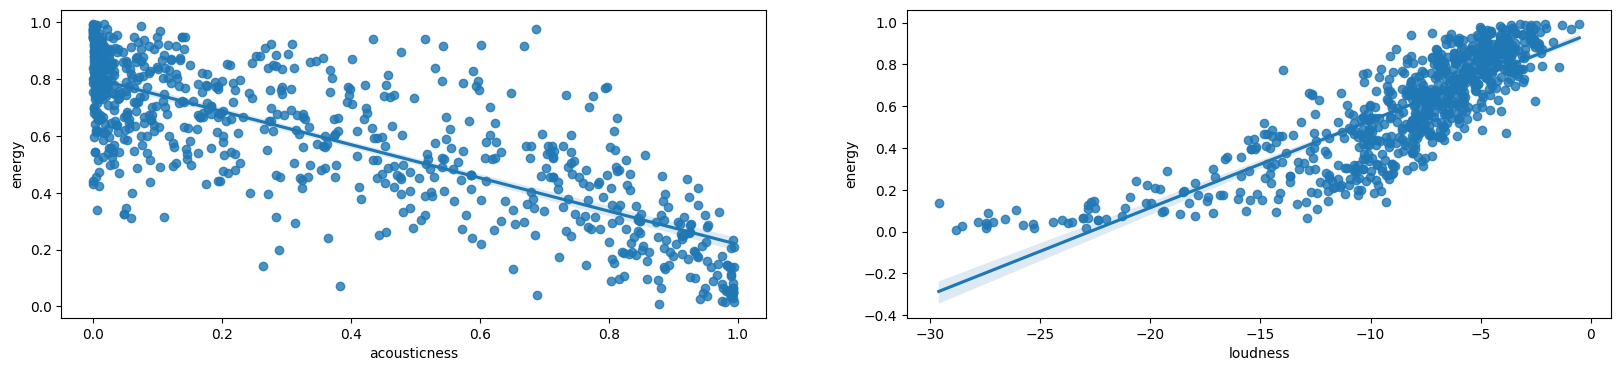

In [30]:
fig,axes = plt.subplots(1,2,figsize=(20,4))
sns.regplot(x="acousticness", y="energy", data=playlist, order=1,ax=axes[0])
sns.regplot(x="loudness", y="energy", data=playlist, order=1,ax=axes[1]);

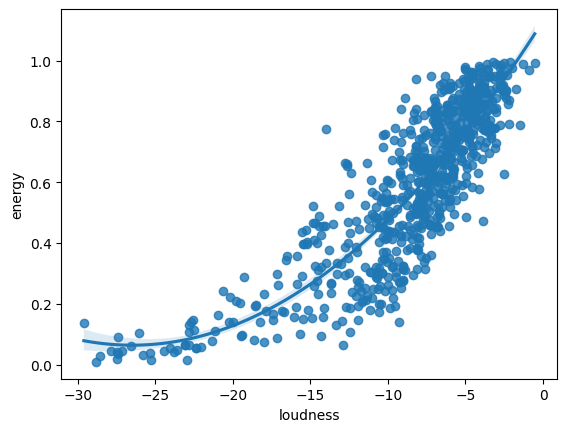

In [31]:
# Vemos si energy y loudness tienen una relación de orden mayor
sns.regplot(x="loudness", y="energy", data=playlist, order=2);

- Se adapta mejor a este modelo de orden 2.

- Ya en un grado menor, con la correlación en 70% podemos tomar las variables `loudness` y `acousticness`. Aunque el resultado no se ve prometedor.

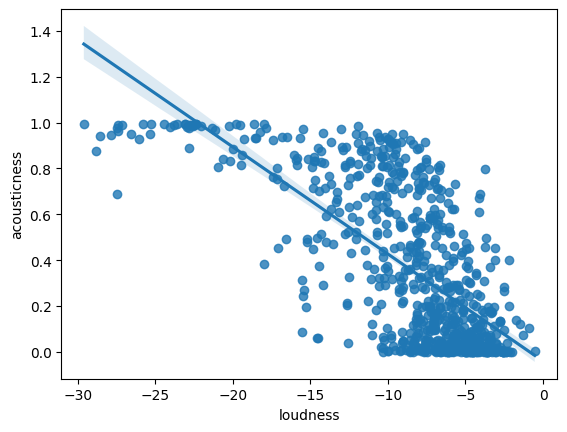

In [32]:
sns.regplot(x="loudness", y="acousticness", data=playlist, order=1);

### Identificación de variables

In [33]:
# Variables de entrada
entrada = playlist.drop('label', axis=1)
salida = playlist.label

#### Boxplot

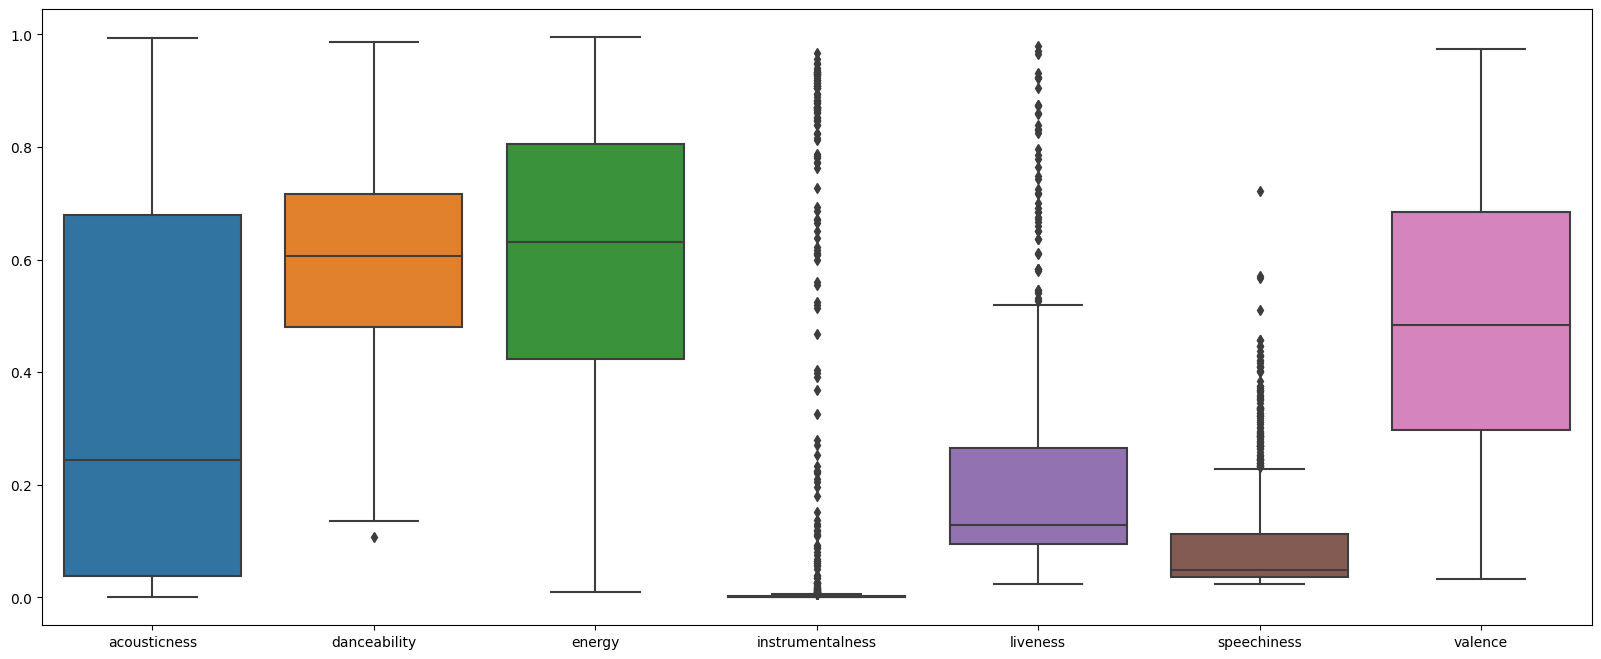

In [34]:
entre_0y1 = playlist[numericas].drop(['duration','loudness', 'tempo'], axis=1)
plt.figure(figsize=(20,8))
sns.boxplot(entre_0y1);

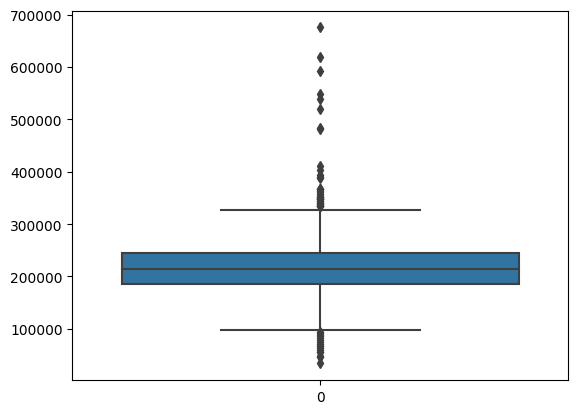

In [35]:
sns.boxplot(data=playlist['duration']);

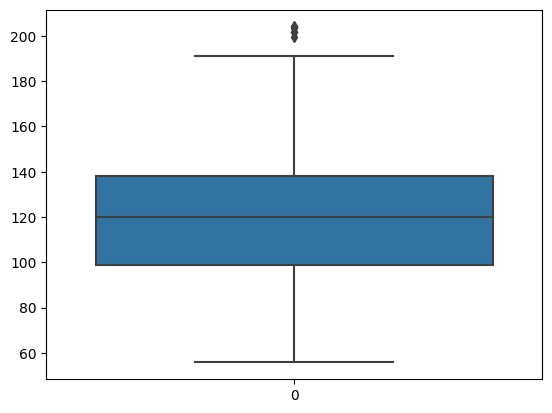

In [36]:
sns.boxplot(data=playlist['tempo']);

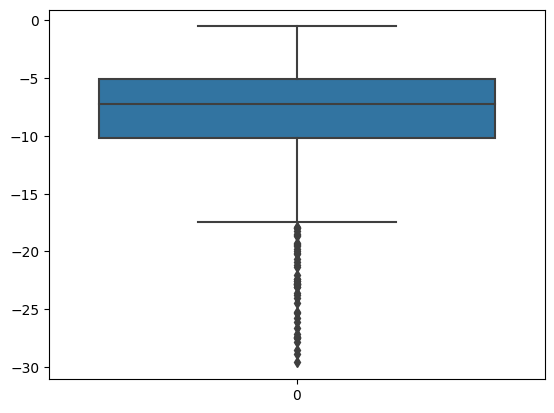

In [37]:
sns.boxplot(data=playlist['loudness']);

## Pruebas de modelos

In [38]:
# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Evaluación de modelos de prueba
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report

# Partición de train-test set
from sklearn.model_selection import train_test_split

# Escalado de features
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Pipelines
from sklearn.pipeline import Pipeline

# Crear datasets
from sklearn.datasets import make_regression

# Esquemas de entrenamiento
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.model_selection import cross_val_score

In [39]:
playlist.columns

Index(['acousticness', 'danceability', 'duration', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'label'],
      dtype='object')

In [40]:
# Diferenciamos en X y en y las variables
X = playlist.drop(columns='label')
y = playlist.label

In [41]:
# Primero realizamos el split
# Particionamos en train y test porque tenemos pocos datos
train_ratio = 0.70
# validation_ratio = 0.20
test_ratio = 1 - train_ratio

# En SKLearn no hay una función para hacer todo en un paso así que lo hacemos en 2.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=(validation_ratio/(validation_ratio+test_ratio))) 

print("Train shape: ", X_train.shape,y_train.shape)
# print("Val: ",X_val.shape,y_val.shape)
print("Test shape:", X_test.shape,y_test.shape)

Train shape:  (524, 13) (524,)
Test shape: (226, 13) (226,)


In [42]:
# Vamos a revisar qué tiene cada split
print(f"Contamos los labels de train:\n{y_train.value_counts()}")
print(f"Contamos los labels de test: \n{y_test.value_counts()}")

Contamos los labels de train:
1    310
0    214
Name: label, dtype: int64
Contamos los labels de test: 
1    142
0     84
Name: label, dtype: int64


### Regresión Logística

In [43]:
# Vamos a usar regresión logística porque se quiere predecir si es una clase 0 o 1
log_reg = LogisticRegression() # usamos un modelo por default

In [44]:
# Vamos a usar todos los features numéricos para entrenar
X_train_num = X_train[numericas]
X_test_num = X_test[numericas]

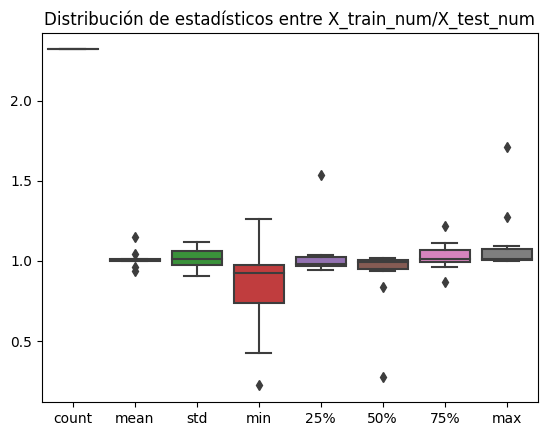

In [45]:
to_plot = X_train_num.describe().T / X_test_num.describe().T
sns.boxplot(to_plot)
plt.title("Distribución de estadísticos entre X_train_num/X_test_num")
plt.show()

In [46]:
# Entrenamos el modelo con este dataset
log_reg.fit(X_train_num, y_train)

LogisticRegression()

In [47]:
# Predecimos los valores
y_hat = log_reg.predict(X_test_num)

In [48]:
# Vamos a ver cómo salió la clasificación
cm = confusion_matrix(y_test, y_hat)
print(cm)

[[ 47  37]
 [ 31 111]]


In [49]:
cr = classification_report(y_test, y_hat)
print(cr)

              precision    recall  f1-score   support

           0       0.60      0.56      0.58        84
           1       0.75      0.78      0.77       142

    accuracy                           0.70       226
   macro avg       0.68      0.67      0.67       226
weighted avg       0.70      0.70      0.70       226



In [50]:
# Realizamos un scalado de los datos para mejorar las distribuciones numéricas
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.fit(X_test_num)

In [51]:
# Realizamos la misma regresión logística pero con los datos escalados
log_reg_scaled = LogisticRegression()
log_reg_scaled.fit(X_train_num_scaled, y_train)

LogisticRegression()

In [52]:
X_test_num_scaled = scaler.transform(X_test_num.values)

C:\Users\segovp01\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
# Predecimos los valores
y_hat_scaled = log_reg_scaled.predict(X_test_num_scaled)

cm = confusion_matrix(y_test, y_hat_scaled)
print("La matriz de confusión: \n", cm)

La matriz de confusión: 
 [[ 65  19]
 [ 31 111]]


In [54]:
cr = classification_report(y_test, y_hat_scaled)
print("Reporte de clasificación: \n", cr)

Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72        84
           1       0.85      0.78      0.82       142

    accuracy                           0.78       226
   macro avg       0.77      0.78      0.77       226
weighted avg       0.79      0.78      0.78       226



- Predice mejor los labels escalando los datos

In [55]:
# Vamos a analizar usando también los features categóricos
X_train[categoricas].head()

,key,mode,time_signature
407,7,1,4
235,0,1,4
456,0,1,4
209,1,1,4
388,6,0,3


In [56]:
X_train.columns

Index(['acousticness', 'danceability', 'duration', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [57]:
# Si pasamos todos los features sin escalar los numéricos al modelo de regresión logística
log_reg_raw = LogisticRegression()
log_reg_raw.fit(X_train, y_train)

LogisticRegression()

In [59]:
# Predecimos los valores
y_hat_raw = log_reg_raw.predict(X_test)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_hat_raw)
print("La matriz de confusión: \n", cm)
print("\n")

# Calculamos el reporte de clasificación
cr = classification_report(y_test, y_hat_raw)
print("Reporte de clasificación: \n", cr)

La matriz de confusión: 
 [[ 11  73]
 [ 18 124]]


Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.38      0.13      0.19        84
           1       0.63      0.87      0.73       142

    accuracy                           0.60       226
   macro avg       0.50      0.50      0.46       226
weighted avg       0.54      0.60      0.53       226



In [82]:
# Vamos a usar los datos numéricos escalados y adjuntamos los features categóricos
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=numericas)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=numericas)

In [83]:
X_train_raw_scaled = X_train_num_scaled.join(X_train[categoricas], how='right')

In [94]:
X_train_num_scaled.isnull().sum()

acousticness        0
danceability        0
duration            0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
dtype: int64

In [95]:
X_train[categoricas].isnull().sum()

key               0
mode              0
time_signature    0
dtype: int64

In [96]:
X_train_raw_scaled.isnull().value_counts()

acousticness  danceability  duration  energy  instrumentalness  liveness  loudness  speechiness  tempo  valence  key    mode   time_signature
False         False         False     False   False             False     False     False        False  False    False  False  False             360
True          True          True      True    True              True      True      True         True   True     False  False  False             164
dtype: int64

In [97]:
X_train_raw_scaled.isnull().sum()

acousticness        164
danceability        164
duration            164
energy              164
instrumentalness    164
liveness            164
loudness            164
speechiness         164
tempo               164
valence             164
key                   0
mode                  0
time_signature        0
dtype: int64

In [77]:
# Si pasamos este dataframe al modelo de regresión logística
log_reg_raw_scaled = LogisticRegression()
log_reg_raw_scaled.fit(X_train_raw_scaled, y_train)

# Predecimos los valores
y_hat_raw_scaled = log_reg_raw_scaled.predict(X_test_raw_scaled)

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_hat_raw_scaled)
print("La matriz de confusión: \n", cm)
print("\n")

# Calculamos el reporte de clasificación
cr = classification_report(y_test, y_hat_raw_scaled)
print("Reporte de clasificación: \n", cr)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values